In [5]:
#提取出处理之后的边
edge_after=[]
for edge in edges_origin:
    if edge[0] in result_nodes and edge[1] in result_nodes:
        edge_after.append(edge)

        

In [7]:

def reindex(edge_list):
    print("正在处理索引压缩")
    node_unique=[]
    for it in edge_list:
        if it[0] not in node_unique:
            node_unique.append(it[0])
        if it[1] not in node_unique:
            node_unique.append(it[1])
    node_unique.sort()
    node_unique_dict={}
    for i,ele in enumerate(node_unique):
        node_unique_dict[ele]=i
    edge_list_new=[[node_unique_dict[x[0]],node_unique_dict[x[1]]] for x in edge_list]
    
    
    # edge_list_unique=[]
    # for i in tqdm(range(len(edge_list_new))):
    #     if edge_list_new[i] not in edge_list_unique:
    #         edge_list_unique.append(edge_list_new[i])
    return edge_list_new,node_unique_dict

In [8]:
edge_afeter_index,node_unique_dict=reindex(edge_after)


正在处理索引压缩


In [11]:
with open("../graph_file/106319_firstprocess.txt","w") as f:
    for edge in edge_afeter_index:
        f.write(str(edge[0])+" "+str(edge[1])+"\n")

In [ ]:
#重新反映射节点



In [1]:
def load_nodes(file_name):
    nodes=[]
    with open(file_name,'r') as f:
        for line in f.readlines():
            line=line.strip()
            nodes.append(line)
    return nodes

In [ ]:
#读取原始索引，获取原始索引
from utils import *
dict1=load_dict("../test_many/106319.dic")
dict2=load_dict("../test_many/106319_second.dic")
dict3=load_dict("../test_many/106319_third.dic")


first_nodes=load_nodes("../test_many/106319_result1.txt")
second_nodes=load_nodes("../test_many/106319_result2.txt")
third_nodes=load_nodes("../test_many/106319_result3.txt")


first_nodes_oringin=get_oringin_node_index(first_nodes,dict1)
senconde_nodes_oringin=get_oringin_node_index( get_oringin_node_index(second_nodes,dict2),dict1)
third_nodes_oringin=get_oringin_node_index( get_oringin_node_index(get_oringin_node_index(third_nodes,dict3),dict2),dict1)

# print(first_nodes[:10],second_nodes[:10],third_nodes[:10])
print(len(first_nodes_oringin),len(senconde_nodes_oringin),len(third_nodes_oringin))
commen_list=[]
num=100
for i in first_nodes_oringin[:num]:

    if i in senconde_nodes_oringin[:num] and i in third_nodes_oringin[:num]:
        commen_list.append(i)

print(len([x for x in first_nodes_oringin[:num] if x in senconde_nodes_oringin[:num]] ))
print(len([x for x in senconde_nodes_oringin[:num] if x in third_nodes_oringin[:num]] ))
print(len([x for x in first_nodes_oringin[:num] if x in senconde_nodes_oringin[:num]  and x in third_nodes_oringin[:num]] ))

print(len(commen_list))





19
32
59
85
126
160
195
229
254
284
314


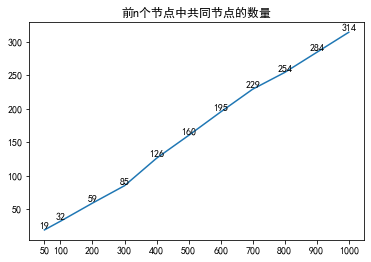

In [34]:
nums=[50,100,200,300,400,500,600,700,800,900,1000]
num=100
x=[]
y=[]
for num in nums:
    commen_list=[]
    for i in first_nodes_oringin[:num]:

        if i in senconde_nodes_oringin[:num] and i in third_nodes_oringin[:num]:
            commen_list.append(i)

    print(len(commen_list))
    x.append(num)
    y.append(len(commen_list))
plt.plot(x,y)
for a,b in zip(x,y):
    plt.text(a,b,b,ha='center',va='bottom',fontsize=10)
plt.xticks(x)
plt.title("前n个节点中共同节点的数量")
plt.show()



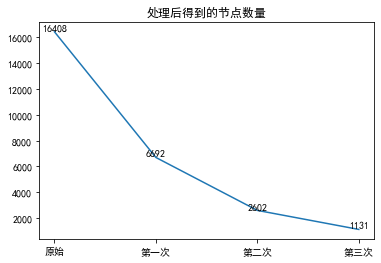

In [21]:
import matplotlib.pyplot as plt
#中文
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
x1,x2,x3=first_nodes_oringin,senconde_nodes_oringin,third_nodes_oringin
x=["原始","第一次","第二次","第三次"]
y=[16408,len(x1),len(x2),len(x3)]


plt.plot(x,y)
#图上标注数字
for a,b in zip(x,y):
    plt.text(a,b,b,ha='center',va='bottom',fontsize=10)
plt.title("处理后得到的节点数量")
plt.show()

x_commen=[x for x in first_nodes_oringin[:num] if x in senconde_nodes_oringin[:num]  and x in third_nodes_oringin[:num]]





In [25]:


import scipy.io as sio
surface=sio.loadmat("../matFile/106319surface.mat")
print(surface.keys())
points=surface["surface"][0][0][0].T

dict_keys(['__header__', '__version__', '__globals__', 'surface'])


In [23]:
def save_vtk(result,filename):
    with open(filename,"w") as f:
        f.write("# vtk DataFile Version 3.0\nmesh surface\nASCII\nDATASET POLYDATA\n")
        f.write("POINTS "+str(len(result))+" float\n")
        for i in result:
            point=points[int(i)]
            f.write(str(point[0])+" "+str(point[1])+" "+str(point[2])+"\n")




In [5]:
save_vtk(first_nodes_oringin,"../test_many/106319_result1_visual.vtk")
save_vtk(senconde_nodes_oringin,"../test_many/106319_result2_visual.vtk")
save_vtk(third_nodes_oringin,"../test_many/106319_result3_visual.vtk")

In [26]:
save_vtk(x_commen,"../test_many/106319_commen.vtk")